<a href="https://colab.research.google.com/github/RhythmRhythmm/Eda/blob/main/EDA_MOD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/RhythmRhythmm/Eda/blob/main/EDA_MOD_1.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
from  datetime import datetime
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/orange_juice_withmissing.csv")
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [ ]:
#MOD 2

In [ ]:
data.dtypes

,0
Purchase,object
WeekofPurchase,int64
StoreID,float64
PriceCH,float64
PriceMM,float64
DiscCH,float64
DiscMM,float64
SpecialCH,float64
SpecialMM,float64
LoyalCH,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [ ]:
#  Dimensions
data.shape

(1070, 18)

In [ ]:
data.size

19260

In [ ]:
# No of dimensions
data.ndim

2

In [ ]:
# No of non null values
data.count().sum()

19220

In [ ]:
# DATA CLEANING

In [ ]:
# Check for column-wise na values
data.isna().sum()

,0
Purchase,0
WeekofPurchase,0
StoreID,1
PriceCH,1
PriceMM,4
DiscCH,2
DiscMM,4
SpecialCH,2
SpecialMM,5
LoyalCH,5


In [ ]:
#total na values before filling
data.isna().sum().sum()

40

In [ ]:
#Mean of column PriceMM
x = round(data['PriceMM'].mean(),2)
x

2.09

In [ ]:
data.PriceMM.fillna(value = x,inplace=True)

<ipython-input-110-cf69cf6f7932>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.PriceMM.fillna(value = x,inplace=True)


In [ ]:
#Mean of column LoyalCH
y = round(data['LoyalCH'].mean(),2)
y

0.57

In [ ]:
data.LoyalCH.fillna(value = y,inplace=True)

<ipython-input-112-65990a95028c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.LoyalCH.fillna(value = y,inplace=True)


In [ ]:
# Replaced 4 na values of PriceMM with mean
# Replaced 5 na values of LoyalCH with mean
# Now no of na values is 31 only (Earlier it was 40)

data.isna().sum().sum()

31

In [ ]:
# Remove null or empty records
data = data.dropna()
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [ ]:
# Total no of duplicates
data.duplicated().sum()

23

In [ ]:
data = data.drop_duplicates()
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [ ]:
# Summary of data
data.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,254.328417,3.941003,1.866844,2.084641,0.050442,0.121475,0.144543,0.161259,0.568501,1.963451,1.816401,0.147050,0.058373,0.026587,0.218083,1.635202
std,15.591687,2.308078,0.102010,0.133665,0.115032,0.212337,0.351812,0.367950,0.306931,0.250569,0.142050,0.269824,0.100991,0.061006,0.107392,1.428637
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.323840,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.200000,0.000000,0.000000,0.852695,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [ ]:
# Binning
bins1 = data['Equal width binning'] = pd.cut(data['PriceCH'], bins=5, labels=False)
bins1

<ipython-input-118-6bd535677e63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins1 = data['Equal width binning'] = pd.cut(data['PriceCH'], bins=5, labels=False)


,PriceCH
0,0
1,0
2,2
3,0
4,0
...,...
1065,2
1066,2
1067,2
1068,2


In [ ]:
bins2 = data['Equal frequency binning'] = pd.qcut(data['PriceCH'], q=5, labels=False,duplicates = 'drop')
bins2

<ipython-input-119-e3d48cd5eb4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins2 = data['Equal frequency binning'] = pd.qcut(data['PriceCH'], q=5, labels=False,duplicates = 'drop')


,PriceCH
0,0
1,0
2,1
3,0
4,0
...,...
1065,1
1066,1
1067,1
1068,1


In [ ]:
#Outliers Detection based on Inter-Quartile range
Q1 = data['LoyalCH'].quantile(0.25)
Q3 = data['LoyalCH'].quantile(0.75)
IQR = Q3 - Q1
data['LoyalCH'] >= IQR

,LoyalCH
0,False
1,True
2,True
3,False
4,True
...,...
1065,True
1066,True
1067,True
1068,True


In [ ]:
 # MOD 3

In [ ]:
#Measures of central tendency

mean = data['SalePriceMM'].mean()
median = data['SalePriceMM'].median()
mode = data['SalePriceMM'].mode()
print(mean,median,mode)

1.9634513274336283 2.09 0    2.09
Name: SalePriceMM, dtype: float64


Text(0.5, 0, 'StoreID')

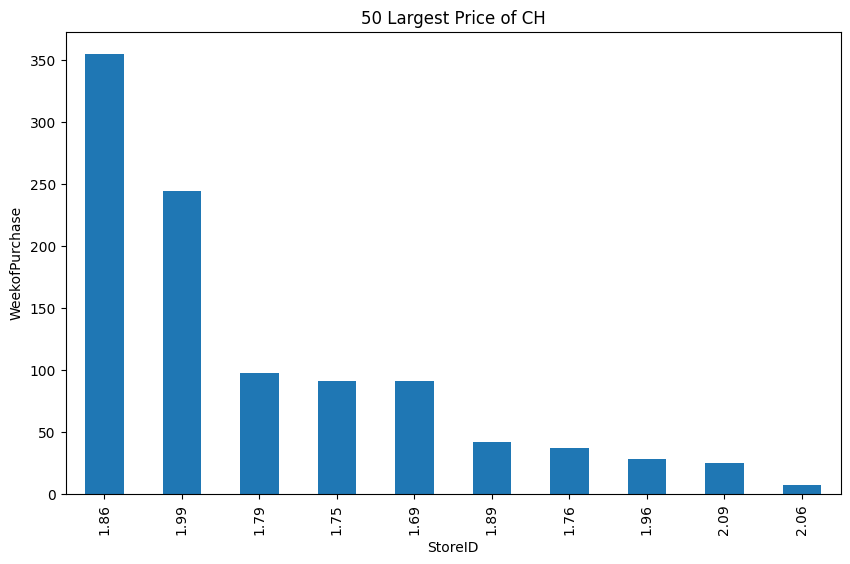

In [ ]:
#50 largest values of PriceCh

data.PriceCH.value_counts().nlargest(50).plot(kind='bar', figsize=(10,6))
plt.title("50 Largest Price of CH")
plt.ylabel('WeekofPurchase')
plt.xlabel('StoreID')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


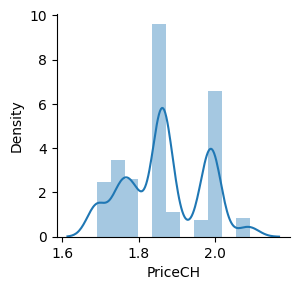

In [ ]:
#Univariate Analysis

#Distribution plot for PriceCH
sns.FacetGrid(data).map(sns.distplot,"PriceCH").add_legend()

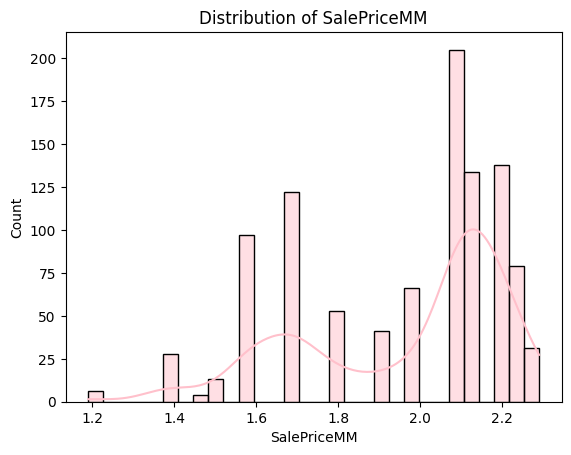

In [ ]:
#Histogram for SalePriceMM
sns.histplot(data['SalePriceMM'], bins=30, kde=True, color='pink')
plt.title(f'Distribution of SalePriceMM')
plt.xlabel('SalePriceMM')
plt.show()

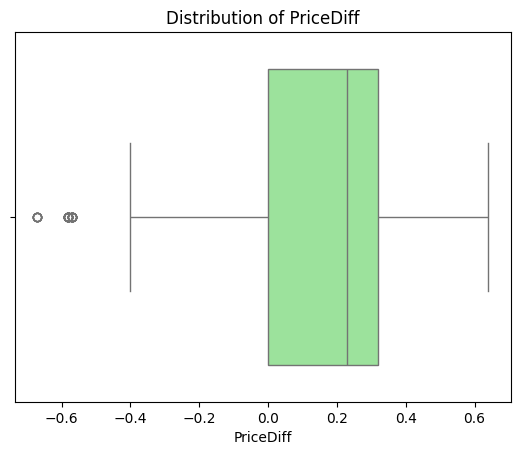

In [ ]:
# Box plot of PriceDiff
sns.boxplot(x="PriceDiff",data=data,color = 'lightgreen')
plt.title(f'Distribution of PriceDiff')
plt.xlabel('PriceDiff')
plt.show()

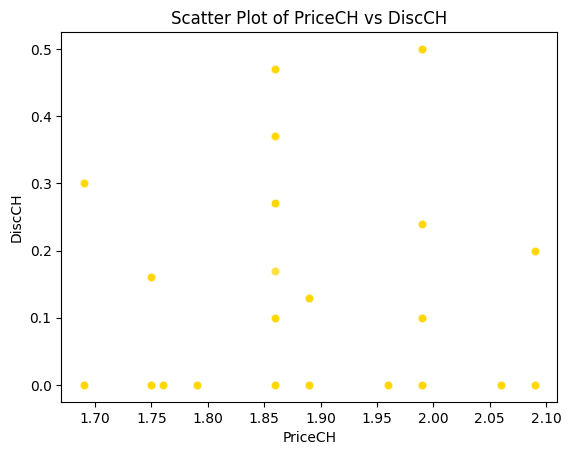

In [ ]:
#Bivariate Analysis

sns.scatterplot(data=data, y='DiscCH', x='PriceCH', color='gold', alpha=0.5)
plt.title('Scatter Plot of PriceCH vs DiscCH')
plt.ylabel('DiscCH')
plt.xlabel('PriceCH')
plt.show()

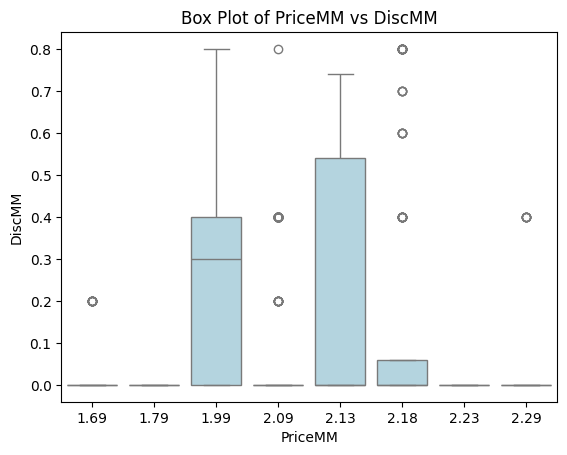

In [ ]:
#Box Plot of PriceMM vs DiscMM
sns.boxplot(x='PriceMM',y='DiscMM',data=data,color = 'lightblue')
plt.title('Box Plot of PriceMM vs DiscMM')
plt.ylabel('DiscMM')
plt.xlabel('PriceMM')
plt.show()

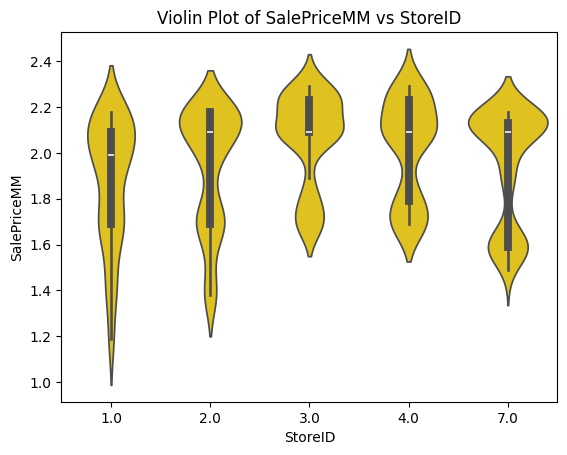

In [ ]:
#Violin plot
sns.violinplot(data=data, x='StoreID', y='SalePriceMM',color = 'gold')
plt.title('Violin Plot of SalePriceMM vs StoreID')
plt.xlabel('StoreID')
plt.ylabel('SalePriceMM')
plt.show()

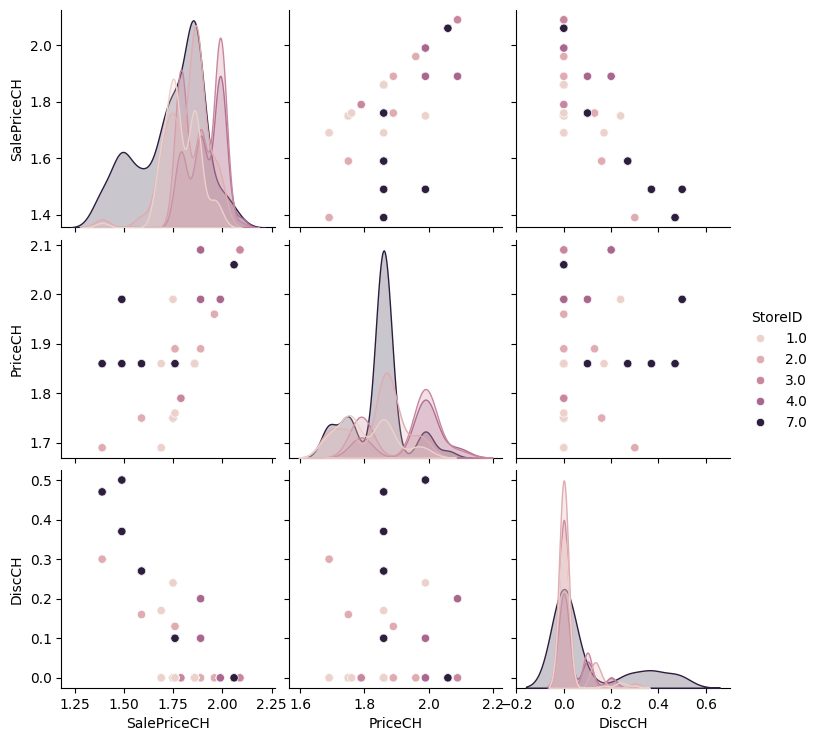

In [ ]:
#Multivariate Analysis

#Pair plots of SalePriceCH, PriceCH, DiscCH with hue = StoreID
sns.pairplot(data, hue='StoreID', vars=['SalePriceCH', 'PriceCH', 'DiscCH'])
plt.show()

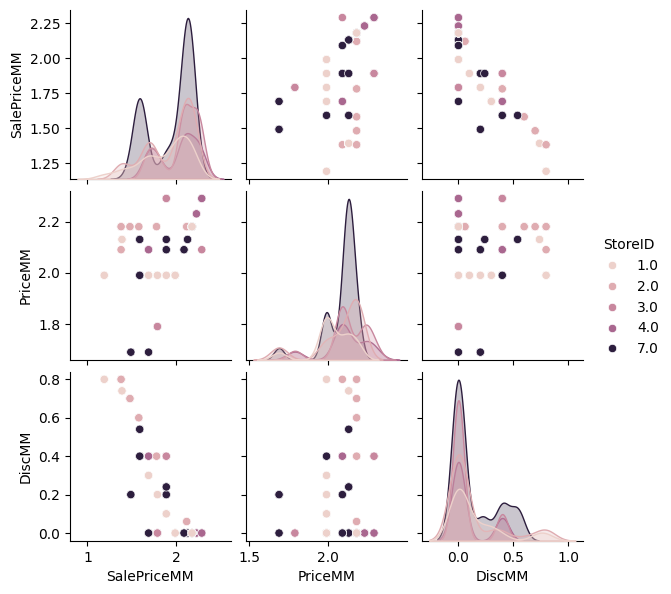

In [ ]:
#Pair plots of SalePriceMM, PriceMM, DiscMM with hue = StoreID

sns.pairplot(data,height=2,vars = ['SalePriceMM', 'PriceMM', 'DiscMM'],hue='StoreID')
plt.show()

In [ ]:
#correlation
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Equal width binning,Equal frequency binning
WeekofPurchase,1.000000,0.092792,0.711952,0.582668,0.353621,0.248219,0.108866,0.058699,0.191425,0.101181,0.224911,-0.024445,0.229320,0.342673,0.050588,-0.048656,0.734258,0.603822
StoreID,0.092792,1.000000,0.022576,0.086389,0.323026,0.018293,0.369299,-0.162630,0.233981,0.029965,-0.245374,0.157005,0.022272,0.324287,0.084639,-0.525612,0.081969,-0.024585
PriceCH,0.711952,0.022576,1.000000,0.613294,0.147441,0.132554,-0.095057,-0.016320,0.080294,0.216103,0.598731,-0.114523,0.115373,0.130085,-0.183584,0.396840,0.971116,0.953198
PriceMM,0.582668,0.086389,0.613294,1.000000,0.062548,0.002588,-0.035838,-0.067665,0.126402,0.531300,0.389773,0.288188,-0.018156,0.056859,0.662197,0.102940,0.619433,0.533153
DiscCH,0.353621,0.323026,0.147441,0.062548,1.000000,0.020573,0.535663,-0.057497,0.126242,0.015433,-0.703919,0.384912,0.017573,0.999015,-0.063368,-0.234091,0.181732,0.125538
DiscMM,0.248219,0.018293,0.132554,0.002588,0.020573,1.000000,0.158939,0.466594,-0.019233,-0.845361,0.078531,-0.826377,0.998794,0.020756,-0.121102,-0.119117,0.107980,0.079115
SpecialCH,0.108866,0.369299,-0.095057,-0.035838,0.535663,0.158939,1.000000,-0.149825,0.132648,-0.154274,-0.502043,0.121038,0.163022,0.549313,0.044596,-0.316016,-0.068938,-0.137827
SpecialMM,0.058699,-0.162630,-0.016320,-0.067665,-0.057497,0.466594,-0.149825,1.000000,-0.102533,-0.431036,0.034841,-0.418619,0.466998,-0.060972,-0.067640,-0.078964,-0.013795,-0.032589
LoyalCH,0.191425,0.233981,0.080294,0.126402,0.126242,-0.019233,0.132648,-0.102533,1.000000,0.083189,-0.044570,0.100716,-0.021470,0.125888,0.079800,-0.093644,0.102835,0.045259
SalePriceMM,0.101181,0.029965,0.216103,0.531300,0.015433,-0.845361,-0.154274,-0.431036,0.083189,1.000000,0.142692,0.853516,-0.855459,0.012246,0.456478,0.156697,0.240119,0.218580


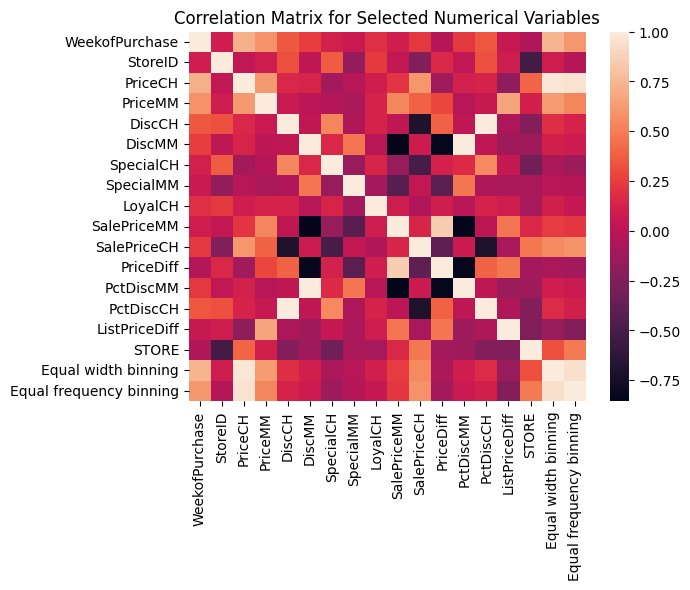

In [ ]:
#Correlation analysis using a heatmap
sns.heatmap(correlation, xticklabels=correlation.columns,
            yticklabels=correlation.columns)
plt.title('Correlation Matrix for Selected Numerical Variables')
plt.show()

In [ ]:
#Time Series Analysis

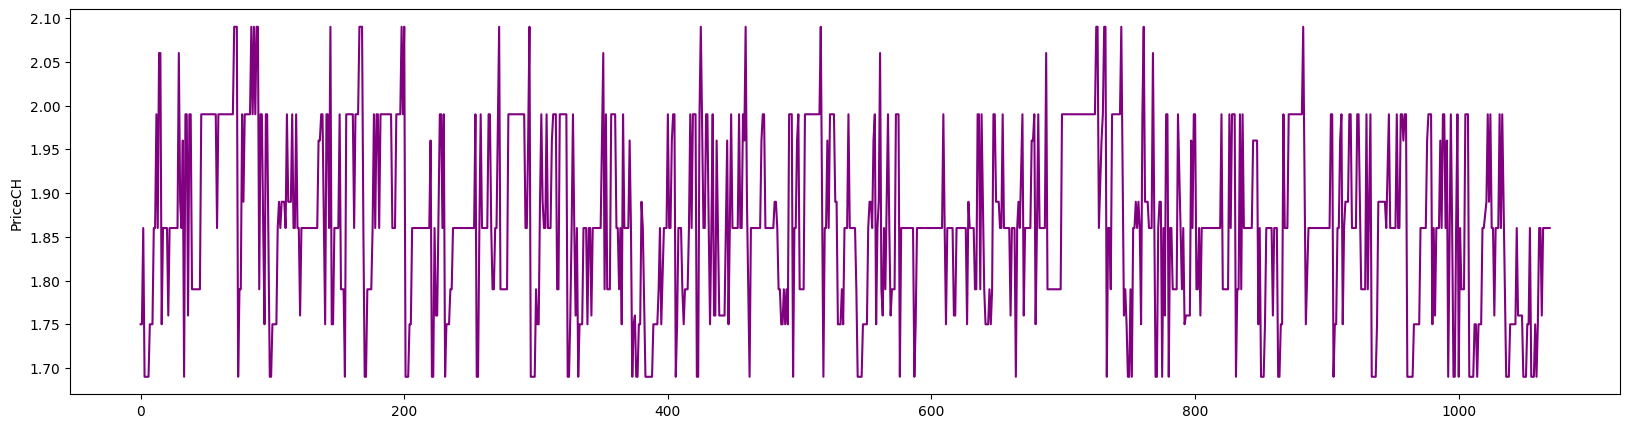

In [ ]:
#Line Plot for PriceCH
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=data['PriceCH'],color = 'purple')
plt.show()

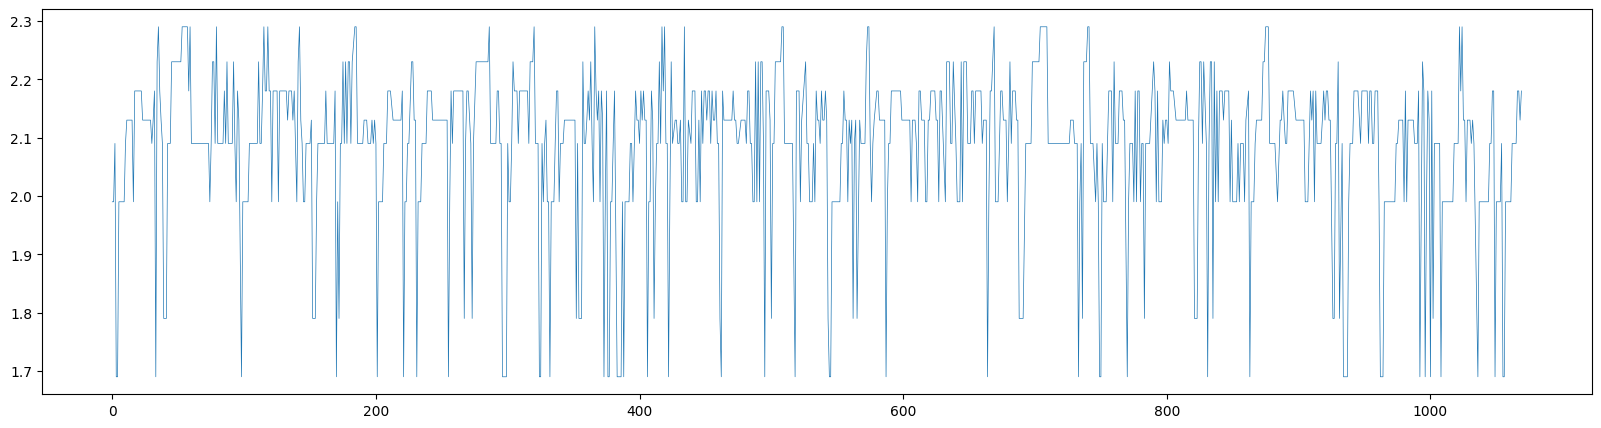

In [ ]:
plt.figure(figsize=(20,5))
data['PriceMM'].plot(linewidth=0.5)
plt.show()

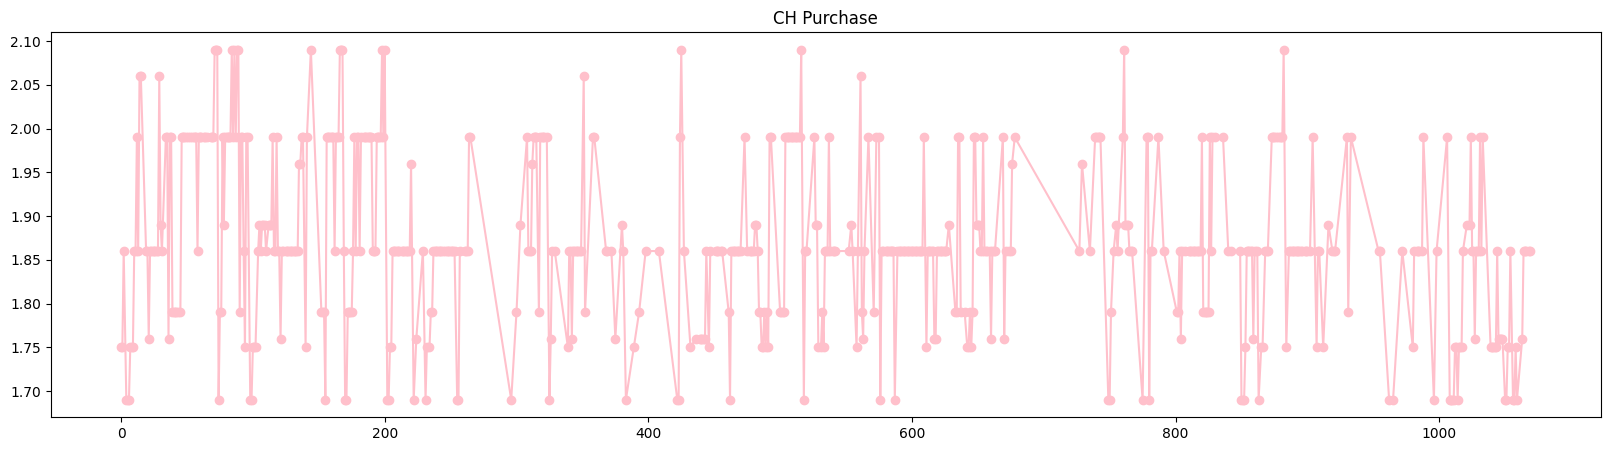

In [ ]:
#DATA FILTERED FOR CH PURCHASE

plt.figure(figsize=(20,5))
# Filter the DataFrame for 'CH' in the 'Purchase' column
ch_data = data[data['Purchase'] == 'CH']

# Plotting 'PriceCH' for the filtered 'CH' data
ch = ch_data['PriceCH'].plot(marker='o', linestyle='-',color = 'pink')
ch.set_title('CH Purchase')
plt.show()

Text(0.5, 1.0, 'Discount less than 2 and greater than 0.2 for CH')

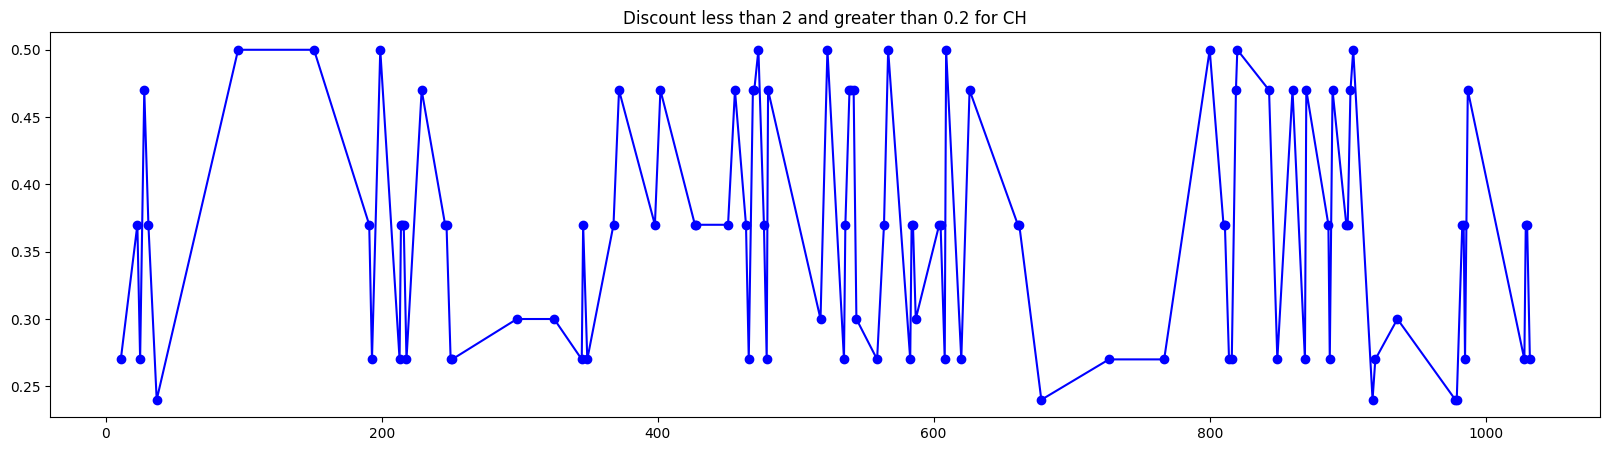

In [ ]:
#Filter Data for discount less than 2 on CH
plt.figure(figsize=(20,5))

ch_disc = data[(data['DiscCH'] < 2) & (data['DiscCH'] > 0.2)]

ch = ch_disc['DiscCH'].plot(marker='o', linestyle='-',color = 'blue')
ch.set_title('Discount less than 2 and greater than 0.2 for CH')


<Axes: xlabel='StoreID', ylabel='PriceMM'>

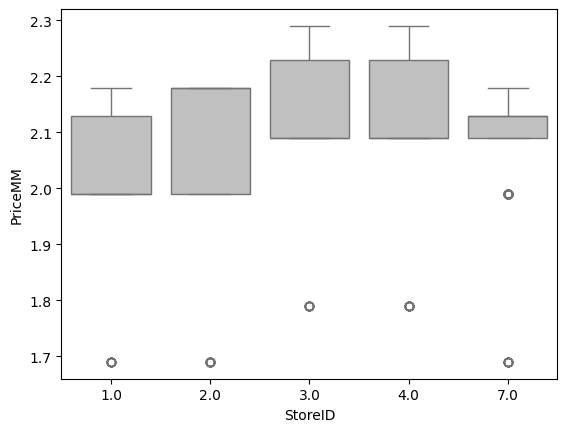

In [ ]:
#Grouping time series data
#Group PriceMM by StoreID and display  in a boxplot

sns.boxplot(data=data, x='StoreID', y='PriceMM',color='silver')

<Axes: xlabel='Purchase', ylabel='PriceMM'>

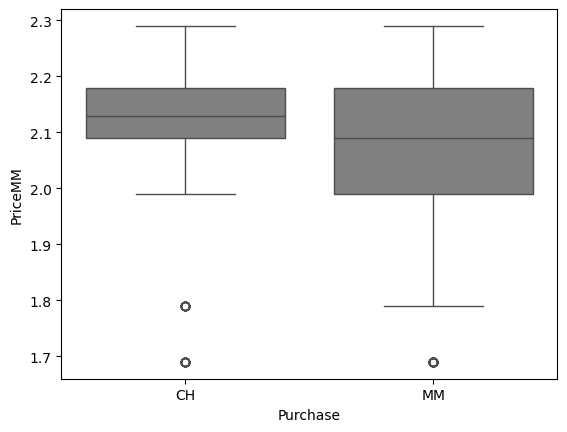

In [ ]:
#Group PriceMM by type of Purchase and display  in a boxplot

sns.boxplot(data=data, x='Purchase', y='PriceMM',color='grey')

In [ ]:
#MOD 4
#1-D Statistical analysis

data.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Equal width binning,Equal frequency binning
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,254.328417,3.941003,1.866844,2.084641,0.050442,0.121475,0.144543,0.161259,0.568501,1.963451,1.816401,0.147050,0.058373,0.026587,0.218083,1.635202,1.804326,1.156342
std,15.591687,2.308078,0.102010,0.133665,0.115032,0.212337,0.351812,0.367950,0.306931,0.250569,0.142050,0.269824,0.100991,0.061006,0.107392,1.428637,1.145885,0.791280
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.323840,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000,1.000000,1.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000,2.000000,1.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.200000,0.000000,0.000000,0.852695,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000,3.000000,2.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000,4.000000,3.000000


In [ ]:
#MEAN OF PRICECH AND PRICEMM
mean_pricech = data['PriceCH'].mean()
mean_pricemm = data['PriceMM'].mean()
print(mean_pricech,mean_pricemm)

1.866843657817109 2.0846411012782693


In [ ]:
#MEDIAN
median_pricech = data['PriceCH'].median()
median_pricemm = data['PriceMM'].median()
print(median_pricech,median_pricemm)

1.86 2.09


In [ ]:
#QUARTILES
quantiles_pricech = data['PriceCH'].quantile([0.25, 0.5, 0.75])
quantiles_pricemm = data['PriceMM'].quantile([0.25, 0.5, 0.75])
print(quantiles_pricech,quantiles_pricemm )

0.25    1.79
0.50    1.86
0.75    1.99
Name: PriceCH, dtype: float64 0.25    1.99
0.50    2.09
0.75    2.18
Name: PriceMM, dtype: float64


In [ ]:
#DECILE
deciles_pricech = data['PriceCH'].quantile(np.linspace(0.1, 1, 10))
print(deciles_pricech)

0.1    1.75
0.2    1.76
0.3    1.79
0.4    1.86
0.5    1.86
0.6    1.86
0.7    1.89
0.8    1.99
0.9    1.99
1.0    2.09
Name: PriceCH, dtype: float64


In [ ]:
IQR = data['PriceCH'].quantile(0.75) - data['PriceCH'].quantile(0.25)
IQR

0.19999999999999996

In [ ]:
#RANGE
range_pricech = data['PriceCH'].max() - data['PriceCH'].min()
range_pricech

0.3999999999999999

In [ ]:
mean_deviation = np.mean(np.abs(data['PriceCH'] - mean_pricech))
std = data['PriceCH'].std()
print("Standard deviation : " ,std, "\n", "Mean deviation : ",mean_deviation)

Standard deviation :  0.10201015148260899 
 Mean deviation :  0.07976813057085584


In [ ]:
#SKEWNESS & KURTOSIS
skewness_pricech = data['PriceCH'].skew()
kurtosis_pricech = data['PriceCH'].kurt()
print("Skewness : ", skewness_pricech)
print("Kurtosis : ", kurtosis_pricech)

Skewness :  0.06457791025080539
Kurtosis :  -0.7764478290150425


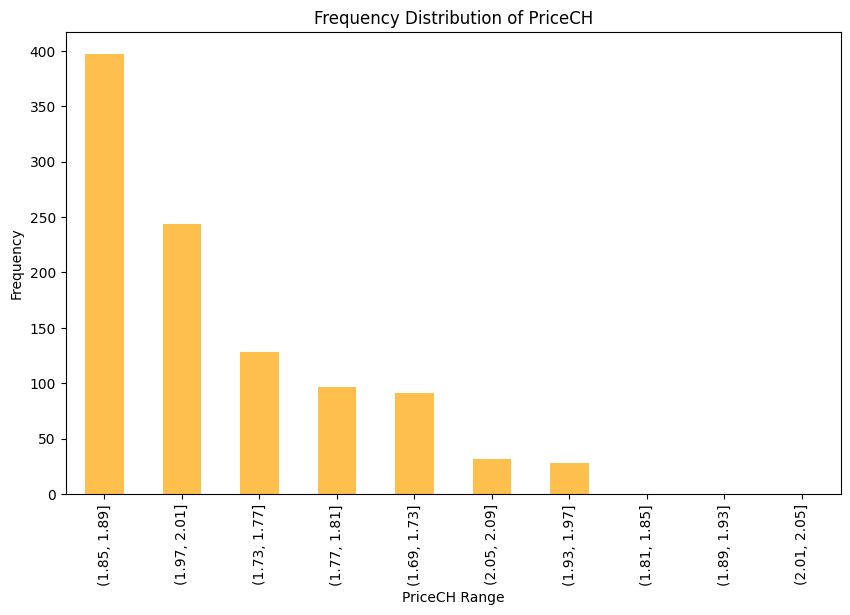

In [ ]:
# Frequency distribution and histogram
pricech_bins = pd.cut(data['PriceCH'], bins=10)
freq_dist = pricech_bins.value_counts()
freq_dist

# Frequency Distribution
plt.figure(figsize=(10,6))
freq_dist.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Frequency Distribution of PriceCH')
plt.xlabel('PriceCH Range')
plt.ylabel('Frequency')
plt.show()

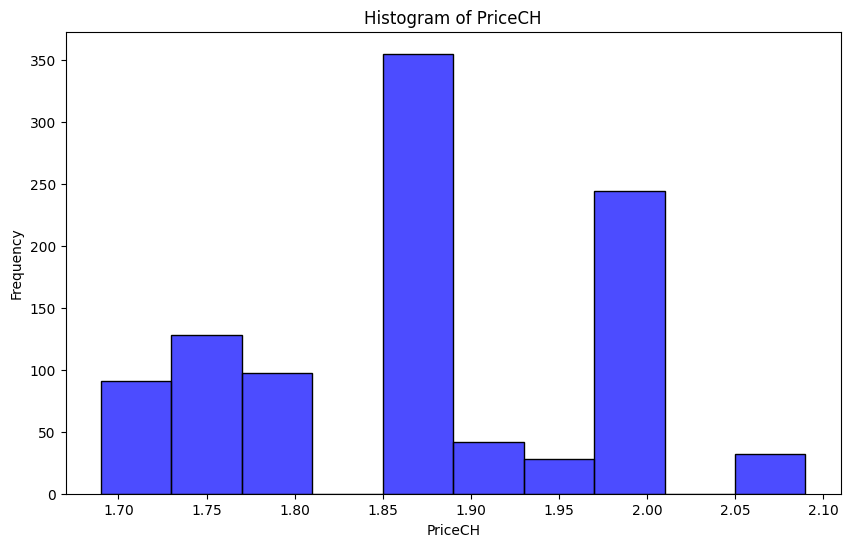

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data['PriceCH'].dropna(), kde=False, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of PriceCH')
plt.xlabel('PriceCH')
plt.ylabel('Frequency')
plt.show()


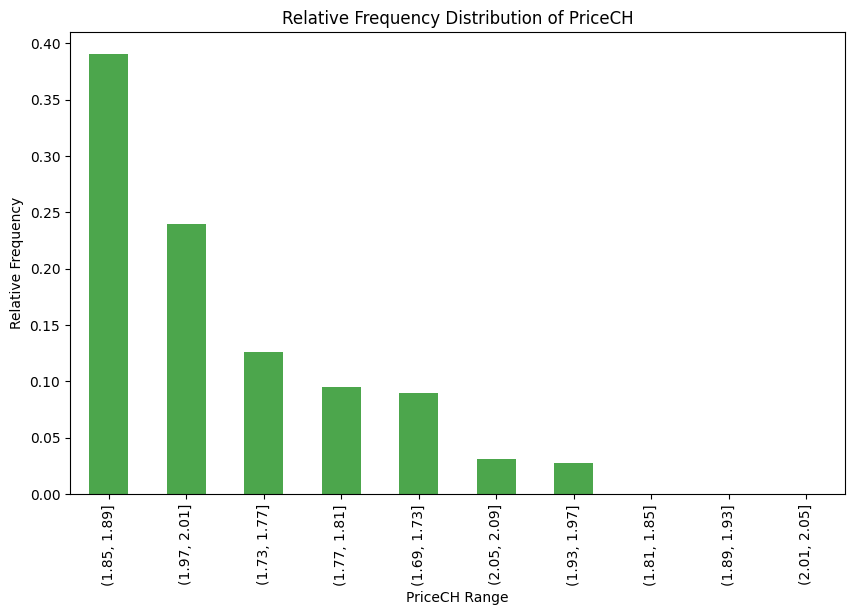

In [ ]:
# Relative Frequency Distribution
relative_freq = freq_dist / len(data['PriceCH'].dropna())
plt.figure(figsize=(10,6))
relative_freq.plot(kind='bar', color='green', alpha=0.7)
plt.title('Relative Frequency Distribution of PriceCH')
plt.xlabel('PriceCH Range')
plt.ylabel('Relative Frequency')
plt.show()

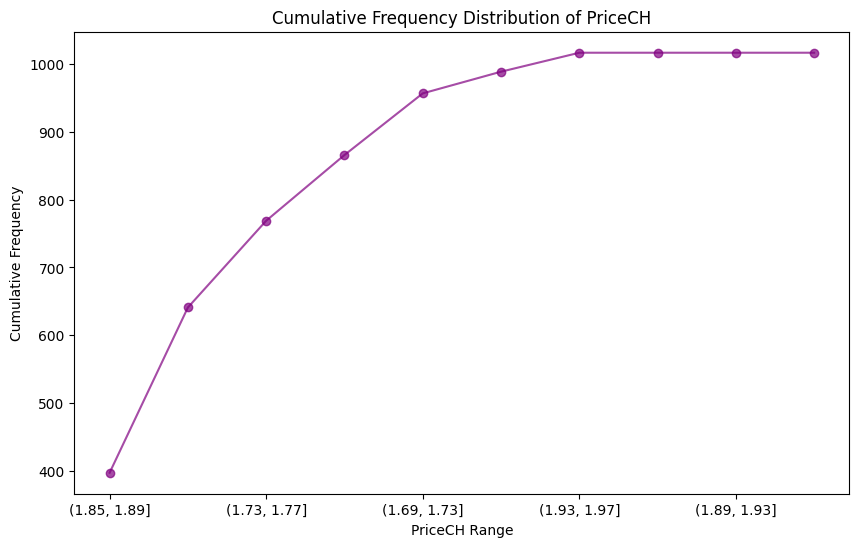

In [ ]:
# Cumulative Frequency Distribution
cumulative_freq = np.cumsum(freq_dist)
plt.figure(figsize=(10,6))
cumulative_freq.plot(kind='line', marker='o', color='purple', alpha=0.7)
plt.title('Cumulative Frequency Distribution of PriceCH')
plt.xlabel('PriceCH Range')
plt.ylabel('Cumulative Frequency')
plt.show()


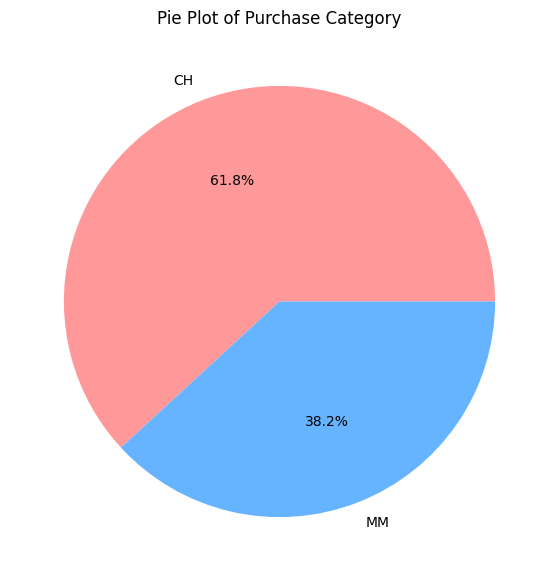

In [ ]:
#Categorical Variable
# Purchase (categorical variable)
purchase_counts = data['Purchase'].value_counts()

# Pie Plot
plt.figure(figsize=(7,7))
purchase_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Pie Plot of Purchase Category')
plt.ylabel('')
plt.show()


<Figure size 1000x600 with 0 Axes>

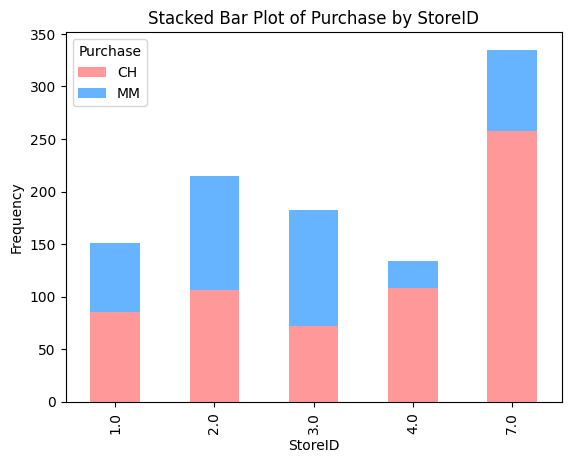

In [ ]:
# Stacked Bar Plot for Purchase vs StoreID
plt.figure(figsize=(10,6))
pd.crosstab(data['StoreID'], data['Purchase']).plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Stacked Bar Plot of Purchase by StoreID')
plt.xlabel('StoreID')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#2-D analysis
#Contingency table

contingency_table = pd.pivot_table(data, values='StoreID', index='Purchase', columns='WeekofPurchase', aggfunc=np.sum)
print(contingency_table)

WeekofPurchase   227   228   229   230   231   232   233   234   235   236  \
Purchase                                                                     
CH              20.0  47.0  48.0  64.0  36.0  45.0  97.0  22.0  37.0  35.0   
MM              21.0  26.0  48.0  23.0  37.0  14.0  34.0  45.0  24.0  43.0   

WeekofPurchase  ...    269   270   271   272   273    274   275   276   277  \
Purchase        ...                                                           
CH              ...  139.0  53.0  54.0  78.0  39.0  136.0  24.0  39.0  75.0   
MM              ...   12.0  15.0  24.0  20.0  13.0   41.0  89.0  65.0  28.0   

WeekofPurchase   278  
Purchase              
CH              57.0  
MM              18.0  

[2 rows x 52 columns]


<ipython-input-156-304e1948972f>:4: FutureWarning: The provided callable <function sum at 0x7e1a1d1f40d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  contingency_table = pd.pivot_table(data, values='StoreID', index='Purchase', columns='WeekofPurchase', aggfunc=np.sum)


In [ ]:
#COVARIANCE
data['PriceCH'].cov(data['PriceMM'])

0.008362399542424457

In [ ]:
# 2-way contingency table: Purchase vs StoreID
contingency_cat_cat = pd.crosstab(data['Purchase'], data['StoreID'])
print(contingency_cat_cat)

StoreID   1.0  2.0  3.0  4.0  7.0
Purchase                         
CH         85  106   72  108  258
MM         66  109  110   26   77


In [ ]:
# Covariance and Correlation between PriceCH and PriceMM
cov_pricech_pricemm = data['PriceCH'].cov(data['PriceMM'])
corr_pricech_pricemm = data['PriceCH'].corr(data['PriceMM'])
print(f"Covariance: {cov_pricech_pricemm}, Correlation: {corr_pricech_pricemm}")

Covariance: 0.008362399542424457, Correlation: 0.6132938598291644


In [ ]:
# Group by Purchase and calculate mean of PriceCH
contingency_cat_num = data.groupby('Purchase')['PriceCH'].mean()
print(contingency_cat_num)

Purchase
CH    1.868076
MM    1.864845
Name: PriceCH, dtype: float64


In [ ]:
# 3-way contingency table
contingency_3_way = pd.crosstab([data['Purchase'], data['StoreID']], data['PriceCH'].apply(lambda x: 'High' if x > data['PriceCH'].mean() else 'Low'))
print(contingency_3_way)

PriceCH           High  Low
Purchase StoreID           
CH       1.0         4   81
         2.0        41   65
         3.0        49   23
         4.0        84   24
         7.0        15  243
MM       1.0        13   53
         2.0        32   77
         3.0        69   41
         4.0        19    7
         7.0        20   57


In [ ]:
# Row Profile (percentage for each row)
row_profile = contingency_3_way.div(contingency_3_way.sum(axis=1), axis=0) * 100
print("Row Profile:\n", row_profile)

Row Profile:
 PriceCH                High        Low
Purchase StoreID                      
CH       1.0       4.705882  95.294118
         2.0      38.679245  61.320755
         3.0      68.055556  31.944444
         4.0      77.777778  22.222222
         7.0       5.813953  94.186047
MM       1.0      19.696970  80.303030
         2.0      29.357798  70.642202
         3.0      62.727273  37.272727
         4.0      73.076923  26.923077
         7.0      25.974026  74.025974


In [ ]:
# Column Profile (percentage for each column)
column_profile = contingency_3_way.div(contingency_3_way.sum(axis=0), axis=1) * 100
print("Column Profile:\n", column_profile)

Column Profile:
 PriceCH                High        Low
Purchase StoreID                      
CH       1.0       1.156069  12.071535
         2.0      11.849711   9.687034
         3.0      14.161850   3.427720
         4.0      24.277457   3.576751
         7.0       4.335260  36.214605
MM       1.0       3.757225   7.898659
         2.0       9.248555  11.475410
         3.0      19.942197   6.110283
         4.0       5.491329   1.043219
         7.0       5.780347   8.494784


In [ ]:
# Relative Frequency for the entire table
relative_freq = contingency_3_way / contingency_3_way.sum().sum() * 100
print("Relative Frequency:\n", relative_freq)

Relative Frequency:
 PriceCH               High        Low
Purchase StoreID                     
CH       1.0      0.393314   7.964602
         2.0      4.031465   6.391347
         3.0      4.818092   2.261554
         4.0      8.259587   2.359882
         7.0      1.474926  23.893805
MM       1.0      1.278269   5.211406
         2.0      3.146509   7.571288
         3.0      6.784661   4.031465
         4.0      1.868240   0.688299
         7.0      1.966568   5.604720


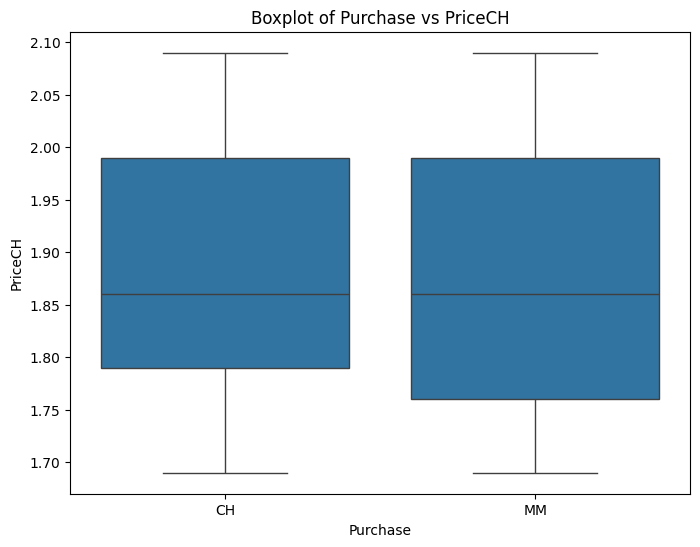

In [ ]:
## Boxplot of Purchase vs PriceCH
plt.figure(figsize=(8,6))
sns.boxplot(x='Purchase', y='PriceCH', data=data)
plt.title('Boxplot of Purchase vs PriceCH')
plt.xlabel('Purchase')
plt.ylabel('PriceCH')
plt.show()

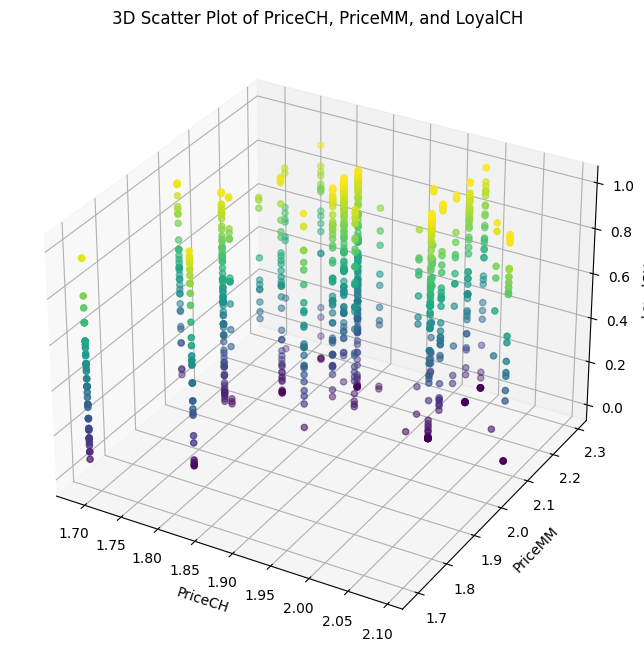

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot for PriceCH, PriceMM, and LoyalCH
ax.scatter(data['PriceCH'], data['PriceMM'], data['LoyalCH'], c=data['LoyalCH'], cmap='viridis')

ax.set_xlabel('PriceCH')
ax.set_ylabel('PriceMM')
ax.set_zlabel('LoyalCH')
plt.title('3D Scatter Plot of PriceCH, PriceMM, and LoyalCH')
plt.show()

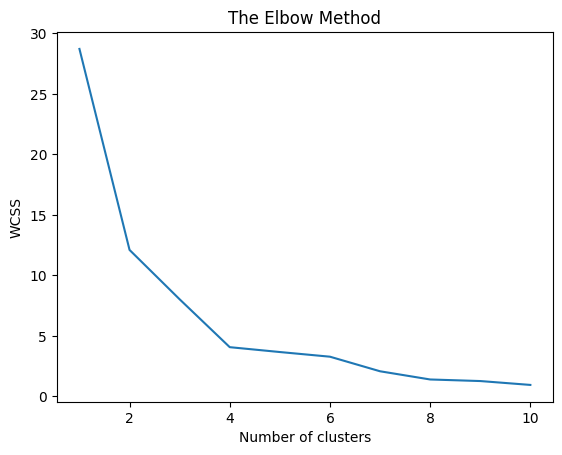

In [ ]:
# MOD 5

#Using the elbow method to find the optimal number of clusters
X = data.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#K means clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

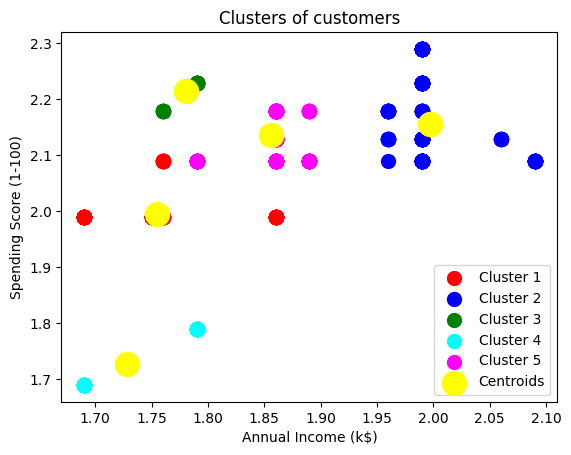

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


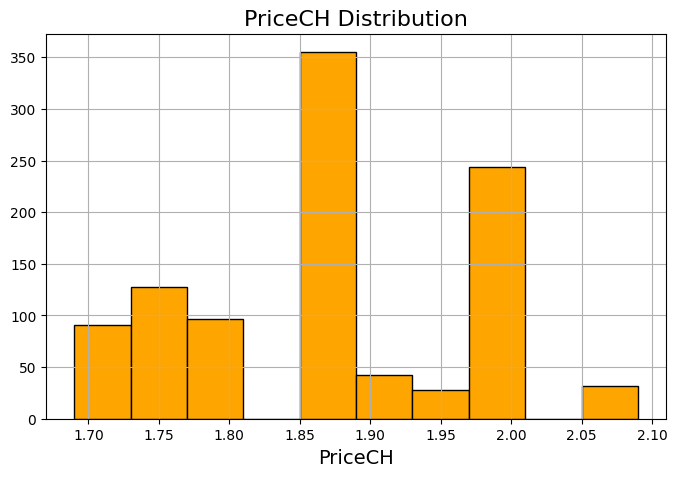

In [ ]:
#Hierarchial clustering
plt.figure(figsize=(8,5))
plt.title("PriceCH Distribution",fontsize=16)
plt.xlabel ("PriceCH",fontsize=14)
plt.grid(True)
plt.hist(data['PriceCH'],color='orange',edgecolor='k')
plt.show()

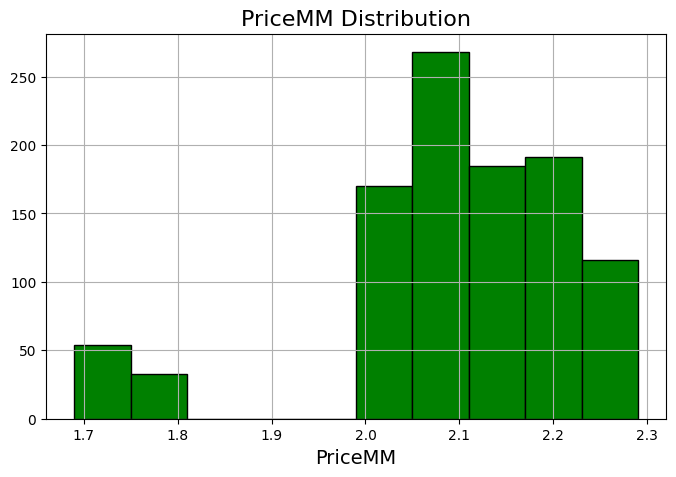

In [ ]:
plt.figure(figsize=(8,5))
plt.title("PriceMM Distribution",fontsize=16)
plt.xlabel ("PriceMM",fontsize=14)
plt.grid(True)
plt.hist(data['PriceMM'],color='green',edgecolor='k')
plt.show()

In [ ]:
#Dendograms
Y = data.iloc[:,[3,4]].values
Y

array([[1.75, 1.99],
       [1.75, 1.99],
       [1.86, 2.09],
       ...,
       [1.86, 2.18],
       [1.86, 2.13],
       [1.86, 2.18]])

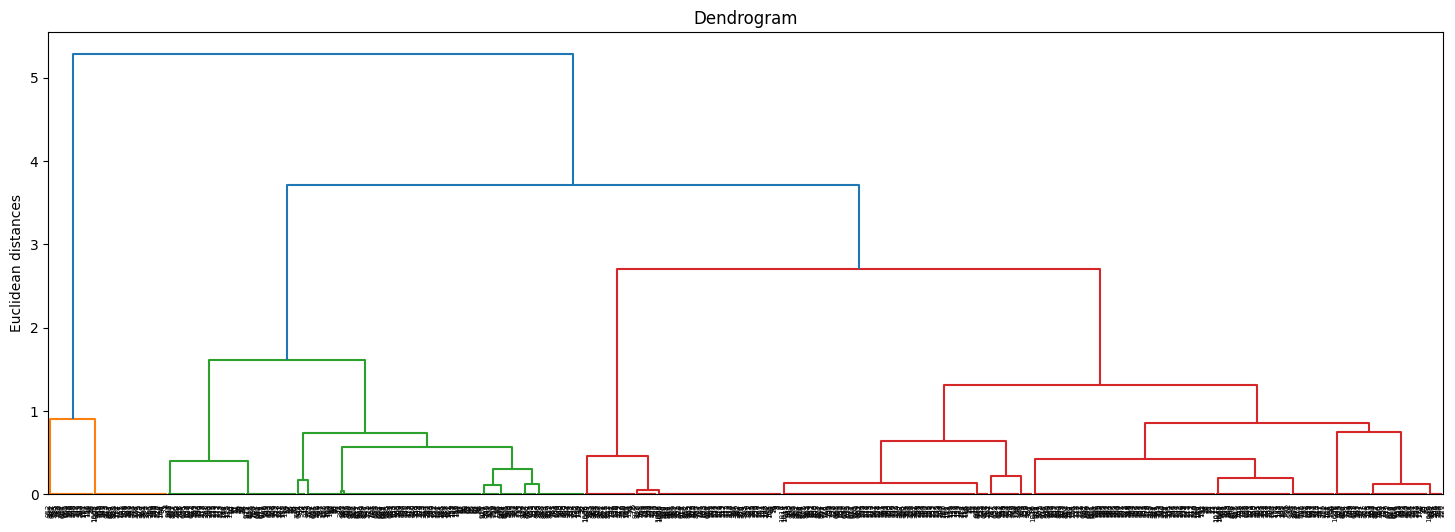

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,6))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.show()

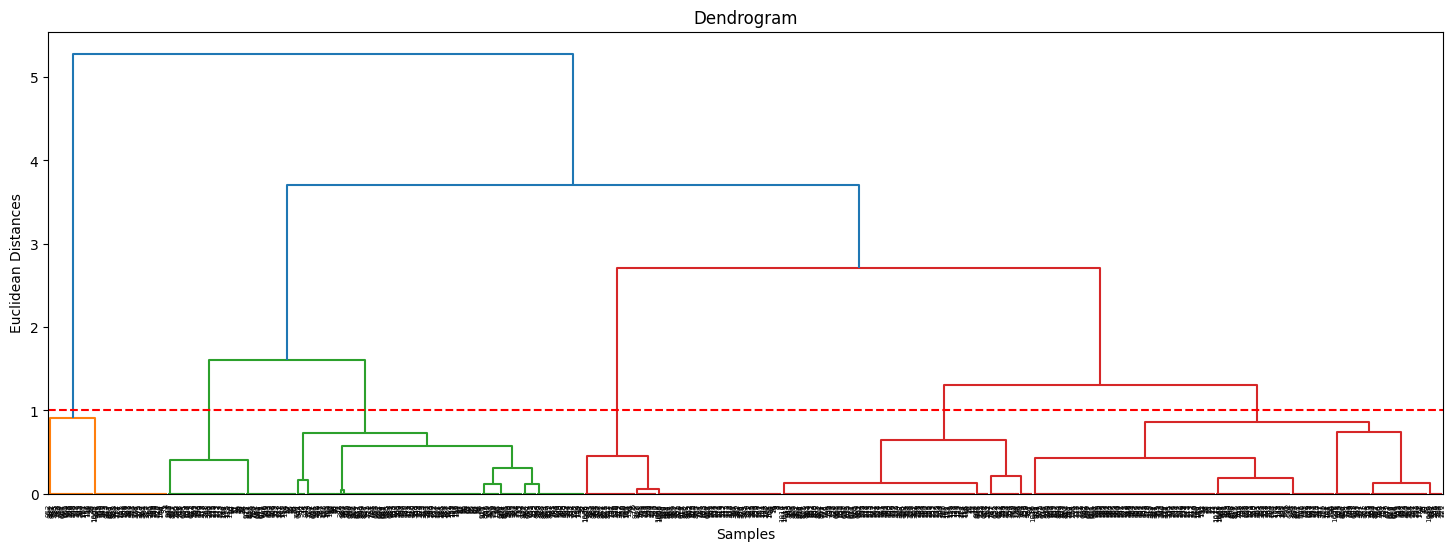

In [ ]:
#Optimal no of clusters
# Plot dendrogram
plt.figure(figsize=(18, 6))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')

# Generate the dendrogram
dendrogram = sch.dendrogram(sch.linkage(Y, method='ward'))

# Add a horizontal line to help determine the optimal number of clusters
plt.axhline(y=1,color='r', linestyle='--')
plt.show()
